# **Desafio Quant Itaú** 

### O objetivo desse notebook é criar uma estratégia quantitativa de investimento baseada em cryptomoedas.

### * *Essa é uma versão final.*

##### **1. Considerações Iniciais**

 - Pela importação dos dados ser mais simples, a lib `yfinance` será usada para criação da estratégia;
 - A estratégia será dividida em duas etapas: uma de otimização (no mínimo 2 anos) e a outra de teste (no mínimo 1 ano);
 - O período dos autores considerado é o dia **30/12/2023**.

##### **2. Reduzindo o Universo das Cryptomoedas**

- Para selecionar as possíveis cryptos que farão parte da nossa carteira, pegamos uma tabela com as cryptos mais antigas do *Wikipedia*.

<table style="width: 45%; display: inline-block; margin-right: 10px; vertical-align: top;">
    <tr>
        <th>Nome</th>
        <th>Ano de Lançamento</th>
        <th>Símbolo</th>
    </tr>
    <tr><td>Bitcoin</td><td>2009</td><td>BTC, XBT, ₿</td></tr>
    <tr><td>Namecoin</td><td>2011</td><td>NMC</td></tr>
    <tr><td>Litecoin</td><td>2011</td><td>LTC, Ł</td></tr>
    <tr><td>Peercoin</td><td>2012</td><td>PPC</td></tr>
    <tr><td>Ripple</td><td>2013</td><td>XRP</td></tr>
    <tr><td>Primecoin</td><td>2013</td><td>XPM</td></tr>
    <tr><td>Nxt</td><td>2013</td><td>NXT</td></tr>
    <tr><td>Mastercoin</td><td>2013</td><td>MSC</td></tr>
    <tr><td>Gridcoin</td><td>2013</td><td>GRC</td></tr>
    <tr><td>Emercoin</td><td>2013</td><td>EMC</td></tr>
    <tr><td>Dogecoin</td><td>2013</td><td>DOGE, XDG, Ð</td></tr>
    <tr><td>Vertcoin</td><td>2014</td><td>VTC</td></tr>
    <tr><td>Verge</td><td>2014</td><td>XVG</td></tr>
    <tr><td>Titcoin</td><td>2014</td><td>TIT</td></tr>
    <tr><td>Stellar</td><td>2014</td><td>XLM</td></tr>
    <tr><td>PotCoin</td><td>2014</td><td>POT</td></tr>
    <tr><td>NEO</td><td>2014</td><td>NEO</td></tr>
    <tr><td>NEM</td><td>2014</td><td>XEM</td></tr>
</table>

<table style="width: 45%; display: inline-block; vertical-align: top;">
    <tr>
        <th>Nome</th>
        <th>Ano de Lançamento</th>
        <th>Símbolo</th>
    </tr>
    <tr><td>Nano</td><td>2014</td><td>NANO</td></tr>
    <tr><td>Monero</td><td>2014</td><td>XMR</td></tr>
    <tr><td>MazaCoin</td><td>2014</td><td>MZC</td></tr>
    <tr><td>Dash</td><td>2014</td><td>DASH</td></tr>
    <tr><td>CloakCoin</td><td>2014</td><td>CLOAK</td></tr>
    <tr><td>BlackCoin</td><td>2014</td><td>BC, BLK</td></tr>
    <tr><td>Auroracoin</td><td>2014</td><td>AUR</td></tr>
    <tr><td>Aeon</td><td>2014</td><td>AEON</td></tr>
    <tr><td>Tether</td><td>2015</td><td>USDT</td></tr>
    <tr><td>Ethereum Classic</td><td>2015</td><td>ETC</td></tr>
    <tr><td>Ethereum</td><td>2015</td><td>ETH</td></tr>
    <tr><td>E-Coins</td><td>2015</td><td>ECS</td></tr>
    <tr><td>Zcash</td><td>2016</td><td>ZEC</td></tr>
    <tr><td>Niobium Coin</td><td>2017</td><td>NBC</td></tr>
    <tr><td>Niobio Cash</td><td>2017</td><td>NBR</td></tr>
    <tr><td>EOS.IO</td><td>2017</td><td>EOS</td></tr>
    <tr><td>Dai</td><td>2017</td><td>DAI</td></tr>
    <tr><td>Cardano</td><td>2017</td><td>ADA, ₳</td></tr>
    <tr><td>Bitcoin Cash</td><td>2017</td><td>BCH</td></tr>
</table>

- Definimos, assim, o **período de otimização**: *30/12/2020* a *30/12/2022*;

##### **2. Definição do BenchMark** 

- Decidimos que o objetivo da nossa carteira é superar a crypto, mais famosa e com maior capitalizaçãço de mercado: o **BitCoin**;

[*********************100%***********************]  1 of 1 completed


Retorno total do Bitcoin no período: 154.42%


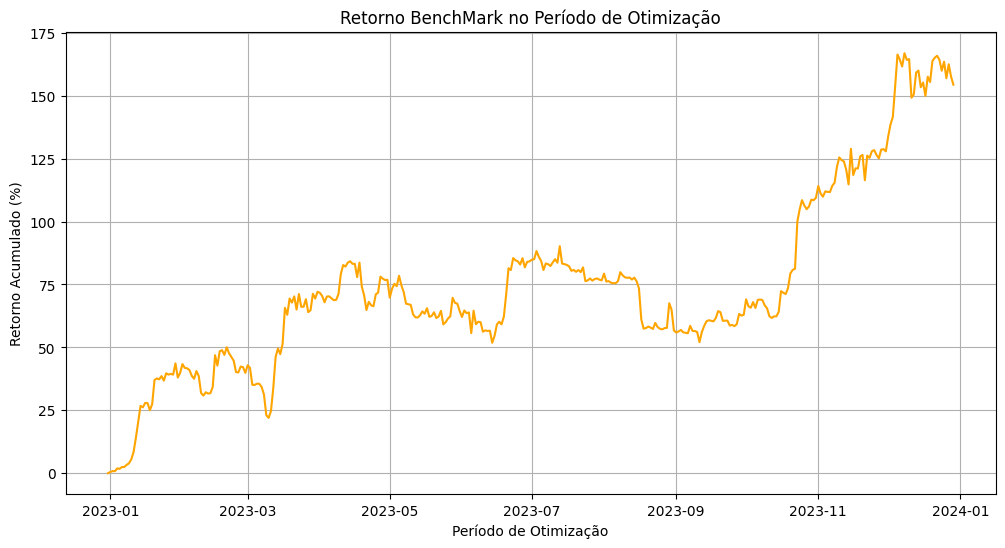

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir o intervalo de tempo
btc_start_date = "2022-12-30"
btc_end_date = "2023-12-30"

# Baixar dados históricos do Bitcoin (Apenas Preços Ajustados)
btc_data = yf.download("BTC-USD", start=btc_start_date, end=btc_end_date)["Adj Close"]

# Verificar se os dados foram baixados corretamente
if btc_data.empty:
    print("Nenhum dado encontrado para o período especificado.")
else:
    # Calcular os retornos diários e remover valores ausentes
    btc_returns = btc_data.pct_change().dropna()

    # Criar o benchmark
    btc_index_returns = btc_returns  # Retorno diário
    crypto_index = (1 + btc_index_returns).cumprod()  # Retorno cumulativo
    crypto_index = (crypto_index / crypto_index.iloc[0] - 1) * 100  # Ajustar para começar em 0

    # Calcular o retorno total do índice
    crypto_inicio = crypto_index.iloc[0].item() # Valor inicial
    crypto_fim = crypto_index.iloc[-1].item() # Valor final
    crypto_retorno_total = (crypto_fim - crypto_inicio) / 100  # Retorno total ajustado

    # Exibir o retorno total do índice no período de teste
    print(f"Retorno total do Bitcoin no período: {crypto_retorno_total * 100:.2f}%")

    # Plotar o gráfico do retorno
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_index, color="orange")
    plt.title('Retorno BenchMark no Período de Otimização')
    plt.xlabel('Período de Otimização')
    plt.ylabel('Retorno Acumulado (%)')
    plt.grid()
    plt.show()


##### **3. Montando a Carteira**

- Dentre todas as cryptos mais antigas, apenas as seguintes possuem símbolo suportado pelo ``yfinance``;

| Nome           | Símbolo (yfinance) |
|----------------|--------------------|
| Namecoin       | NMC-USD            |
| Litecoin       | LTC-USD            |
| Ripple         | XRP-USD            |
| Dogecoin       | DOGE-USD           |
| Vertcoin       | VTC-USD            |
| Verge          | XVG-USD            |
| Stellar        | XLM-USD            |
| NEO            | NEO-USD            |
| Monero         | XMR-USD            |
| Dash           | DASH-USD           |
| Tether         | USDT-USD           |
| Ethereum Classic | ETC-USD         |
| Ethereum       | ETH-USD            |
| Zcash          | ZEC-USD            |
| EOS.IO         | EOS-USD            |
| Dai            | DAI-USD            |
| Cardano        | ADA-USD            |
| Bitcoin Cash   | BCH-USD            |


- Dentre essas 18 cryptos, vamos comparar o retorno de cada uma no período de otimização;

[*********************100%***********************]  18 of 18 completed


Retorno total do ADA-USD no período: 34.59%
Retorno total do BCH-USD no período: -71.32%
Retorno total do DAI-USD no período: -0.36%
Retorno total do DASH-USD no período: -57.23%
Retorno total do DOGE-USD no período: 1417.34%
Retorno total do EOS-USD no período: -66.68%
Retorno total do ETC-USD no período: 177.14%
Retorno total do ETH-USD no período: 62.86%
Retorno total do LTC-USD no período: -46.47%
Retorno total do NEO-USD no período: -56.87%
Retorno total do NMC-USD no período: 128.38%
Retorno total do USDT-USD no período: -0.09%
Retorno total do VTC-USD no período: -10.05%
Retorno total do XLM-USD no período: -43.89%
Retorno total do XMR-USD no período: -6.98%
Retorno total do XRP-USD no período: 55.95%
Retorno total do XVG-USD no período: -64.42%
Retorno total do ZEC-USD no período: -40.55%


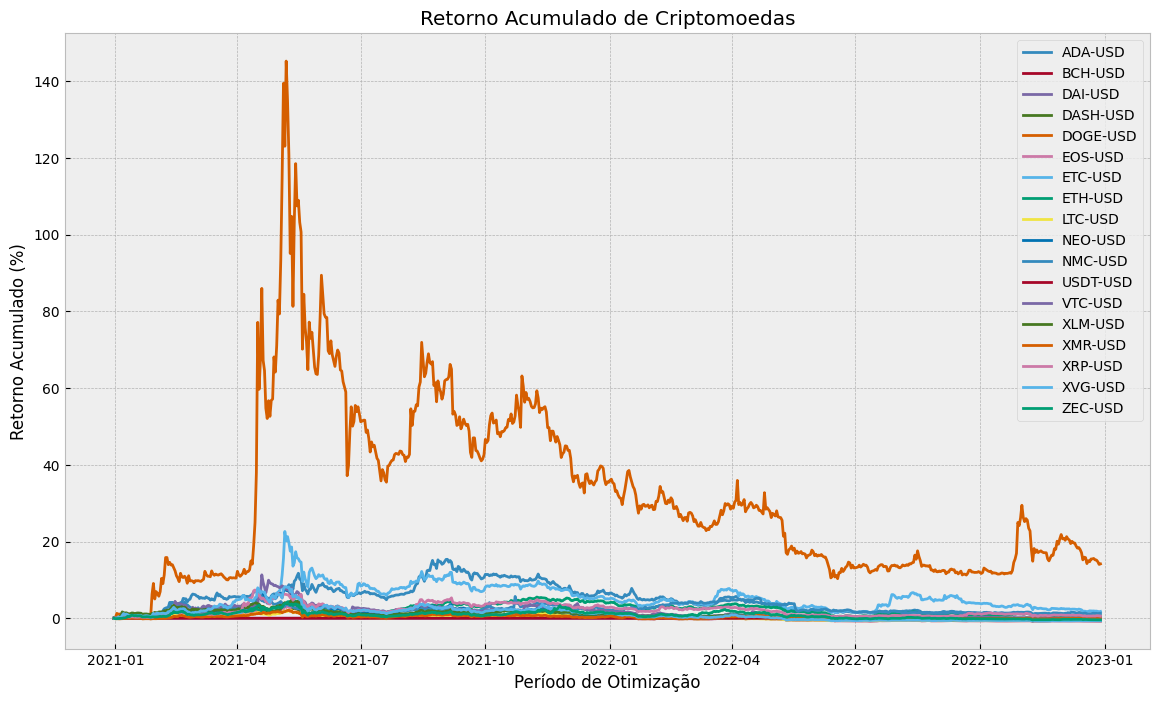

In [75]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Lista das criptomoedas com os símbolos suportados pelo yfinance
crypto_symbols = ["NMC-USD", "LTC-USD", "XRP-USD", "DOGE-USD", "VTC-USD", "XVG-USD",
                  "XLM-USD", "NEO-USD", "XMR-USD", "DASH-USD", "USDT-USD", "ETC-USD", "ETH-USD",
                  "ZEC-USD", "EOS-USD", "DAI-USD", "ADA-USD", "BCH-USD"]

# Data de início e término
start_date = "2020-12-30"
end_date = "2022-12-30"

# Download dos dados históricos de fechamento ajustado
data = yf.download(crypto_symbols, start=start_date, end=end_date)["Adj Close"]

# Calcular os retornos diários e remover valores ausentes
cryptos_returns = data.pct_change().dropna()

# Calcular o retorno cumulativo
cryptos_index = (1 + cryptos_returns).cumprod()  # Retorno cumulativo
cryptos_index = (cryptos_index / cryptos_index.iloc[0] - 1)  # Ajustar para começar em 0

# Plot do gráfico de retorno
plt.figure(figsize=(14, 8))
for symbol in cryptos_returns.columns:
    # Calcular o retorno total da criptomoeda no período de teste
    cryptos_inicio = cryptos_index[symbol].iloc[0]  # Valor inicial para cada criptomoeda
    cryptos_fim = cryptos_index[symbol].iloc[-1]    # Valor final para cada criptomoeda
    cryptos_retorno_total = (cryptos_fim - cryptos_inicio)  # Retorno total ajustado

    # Exibir o retorno total da criptomoeda no período de teste
    print(f"Retorno total do {symbol} no período: {cryptos_retorno_total * 100:.2f}%")

    # Plota o retorno
    plt.plot(cryptos_index.index, cryptos_index[symbol], label=symbol)

plt.title("Retorno Acumulado de Criptomoedas")
plt.xlabel("Período de Otimização")
plt.ylabel("Retorno Acumulado (%)")
plt.legend()
plt.grid(True)
plt.show()

- Das informações acima, selecionamos as cryptomoedas com retorno igual ou maior do que o do BitCoin no mesmo período:
    - ADA
    - DAI
    - DOGE
    - ETC
    - ETH
    - NMC
    - XRP

- Vamo analisar agora a correlação dos preços de fechamento ajustado dessas cryptos selecionadas e do BitCoin;

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


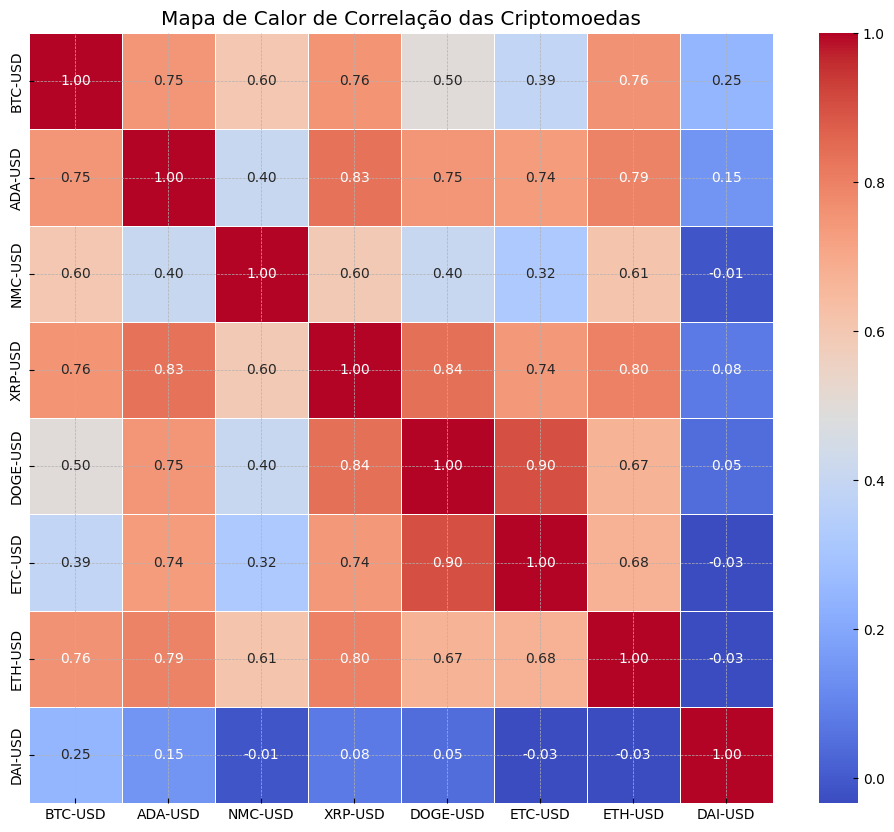

In [62]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de tickers das 7 criptomoedas
tickers = ["BTC-USD","ADA-USD","NMC-USD", "XRP-USD", "DOGE-USD","ETC-USD", "ETH-USD", "DAI-USD"]

# Inicializar um DataFrame vazio para armazenar os dados de fechamento ajustado
corr_crypto = pd.DataFrame()

# Baixar dados de fechamento ajustado para todas as criptomoedas e adicionar ao DataFrame
for ticker in tickers:
    dados = yf.download(ticker, start="2020-12-30", end="2022-12-30", interval="1d")["Adj Close"]
    corr_crypto[ticker] = dados

# Calcular a matriz de correlação
correlation_matrix = corr_crypto.corr()

# Plotar o mapa de calor da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlação das Criptomoedas")
plt.show()
#plt.savefig("Mapa_Calor_Final.png", dpi=300)


- Como queremos superar o ``BTC``, vamos selecionar as criptos com correlação menor ou igual a $0.5$ com o **BitCoin**:
    - DOGE
    - ETC
    - DAI

- **Carteira - `DogeCoin (DOGE-USD)`  `Ethereum Classic (ETC-USD)` `Dai (DAI-USD)`**

- Assim, definimos o **período de teste**: *30/12/2022* a *30/12/2023*; 

##### **3. Calculando os Pesos das Crypto na Carteira**

- Vamos determinar o peso de cada crypto na carteira com base na volatilidade no període de otimização;

In [72]:
import yfinance as yf
import pandas as pd
import numpy as np

# Lista de criptomoedas e período de análise
carteira = ["ADA-USD","NMC-USD", "XRP-USD", "DOGE-USD","ETC-USD", "ETH-USD", "DAI-USD"]
start_date = "2020-12-30"
end_date = "2022-12-30"

# Baixar dados de fechamento ajustado
dados_peso = yf.download(carteira, start=start_date, end=end_date, interval="1d")["Adj Close"]

# Calcular retornos diários
retornos_diarios = dados_peso.pct_change().dropna() # pct_change calcula a porcentagem de mudança de uma linha com a linha anterior

# Calcular a volatilidade anualizada (desvio padrão dos retornos diários anualizado)
volatilidade_anualizada = retornos_diarios.std() * np.sqrt(3*252)

# Inverter a volatilidade para calcular os pesos (maior volatilidade = menor peso)
pesos_invertidos = 1 / volatilidade_anualizada
pesos = pesos_invertidos / pesos_invertidos.sum()

# Exibir os pesos calculados
print("Pesos da carteira com base na volatilidade histórica:")
for ticker, peso in zip(carteira, pesos):
    print(f"{ticker}: {peso:.2%}")

[*********************100%***********************]  7 of 7 completed


Pesos da carteira com base na volatilidade histórica:
ADA-USD: 2.49%
NMC-USD: 87.57%
XRP-USD: 0.92%
DOGE-USD: 2.06%
ETC-USD: 2.90%
ETH-USD: 1.79%
DAI-USD: 2.28%


- ***Explicação Detalhada***
    - **Download dos dados**: Baixamos os dados diários de fechamento ajustado de 2015 a 2022.
    - **Retornos diários**: Calculamos os retornos diários para medir a variação percentual diária dos preços.
    - **Volatilidade**: Multiplicamos o desvio padrão dos retornos diários por $\sqrt(2*252)$ (252 dias de negociação por ano) para encontrar a volatilidade.
    - **Calcular os pesos**: Invertemos a volatilidade para obter o fator proporcional dos pesos e normalizamos a soma para 1.

##### **4. Definição do Tipo de Estratégia**

- ***Estratégia de Média Móvel de Convergência/Divergência (MACD):***
    - Consideração de duas médias móveis para cada ativo: uma de curto prazo (mais rápida) e uma de longo prazo (mais lenta);
    - A lógica é comprar um ativo quando a média móvel curta ultrapassa a média móvel longa (indicando uma tendência de alta) e vender quando ocorre o contrário (indicando uma tendência de baixa);
    - **Explicação Detalhada**:
        - *Estratégia de Média Móvel*: Definimos a função ``moving_average_strategy`` que calcula as médias móveis de curto e longo prazo e gera sinais de compra e venda.
        - *Otimização*: Testamos várias combinações de períodos para as médias móveis curtas (10 a 50 dias) e longas (100 a 250 dias) e escolhemos a combinação que maximiza o retorno cumulativo no   período de 2015 a 2021.
        - *Teste da Estratégia*: Usamos os parâmetros otimizados para cada criptomoeda e aplicamos a estratégia no período de 2022 a 2023.
        - *Resultados*: Calculamos e exibimos o retorno acumulado da estratégia de média móvel para cada criptomoeda durante o período de teste.
    

[*********************100%***********************]  7 of 7 completed
C:\Users\lucas\AppData\Local\Temp\ipykernel_12768\1131076148.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short

Melhor janela para ADA-USD: Curta=50, Longa=100
Melhor janela para NMC-USD: Curta=30, Longa=250
Melhor janela para XRP-USD: Curta=30, Longa=100
Melhor janela para DOGE-USD: Curta=10, Longa=150
Melhor janela para ETC-USD: Curta=20, Longa=250


C:\Users\lucas\AppData\Local\Temp\ipykernel_12768\1131076148.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)


Melhor janela para ETH-USD: Curta=20, Longa=100
Melhor janela para DAI-USD: Curta=10, Longa=100


[*********************100%***********************]  7 of 7 completed


Retornos da estratégia de média móvel no período de teste:
ADA-USD: -0.30%
NMC-USD: 9.56%
XRP-USD: 135.04%
DOGE-USD: 15.31%
ETC-USD: -1.61%
ETH-USD: -15.64%
DAI-USD: 1.48%

Retorno total da carteira: 16.61%



C:\Users\lucas\AppData\Local\Temp\ipykernel_12768\1131076148.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)

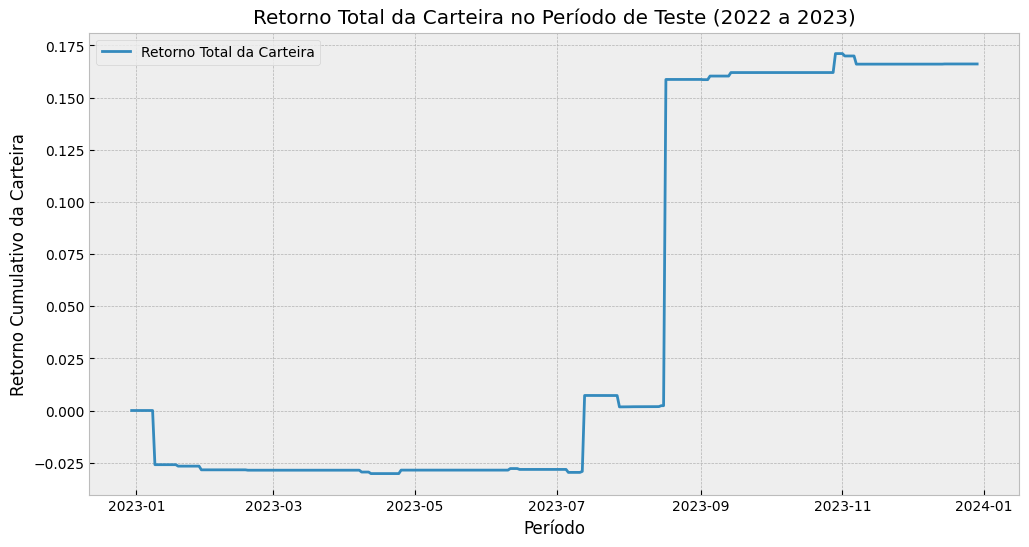

In [73]:
import yfinance as yf
import pandas as pd
import numpy as np

# Configurações da estratégia
tickers = ["ADA-USD","NMC-USD", "XRP-USD", "DOGE-USD","ETC-USD", "ETH-USD", "DAI-USD"]
start_date_train = "2020-12-30"
end_date_train = "2022-12-30"
start_date_test = "2022-12-30"
end_date_test = "2023-12-30"

# Função para executar a estratégia de média móvel
def moving_average_strategy(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data
    signals['Short_MA'] = data.rolling(window=short_window).mean()
    signals['Long_MA'] = data.rolling(window=long_window).mean()
    signals['Signal'] = 0.0

    # Gerar sinais de compra (+1) e venda (-1)
    signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
    signals['Position'] = signals['Signal'].diff()  # Identifica mudanças nos sinais

    return signals

# Baixar dados históricos de treinamento
dados_train = yf.download(tickers, start=start_date_train, end=end_date_train, interval="1d")["Adj Close"]

# Otimizar a estratégia para encontrar os melhores parâmetros de janela
best_params = {}
for ticker in tickers:
    data = dados_train[ticker].dropna()
    best_return = -np.inf
    best_short_window = None
    best_long_window = None
    
    # Testar várias combinações de janelas curtas e longas
    for short_window in range(10, 60, 10):  # Janela curta de 10 a 50 dias
        for long_window in range(100, 300, 50):  # Janela longa de 100 a 250 dias
            signals = moving_average_strategy(data, short_window, long_window)
            # Calcular o retorno cumulativo
            returns = (signals['Position'] * data.pct_change()).cumsum().iloc[-1]
            
            # Verificar se essa combinação é melhor
            if returns > best_return:
                best_return = returns
                best_short_window = short_window
                best_long_window = long_window
    
    # Salvar os melhores parâmetros para cada ativo
    best_params[ticker] = (best_short_window, best_long_window)
    print(f"Melhor janela para {ticker}: Curta={best_short_window}, Longa={best_long_window}")

# Testar a estratégia com os melhores parâmetros de 2022 a 2023
dados_test = yf.download(tickers, start=start_date_test, end=end_date_test, interval="1d")["Adj Close"]
strategy_results = {}
portfolio_returns = pd.DataFrame(index=dados_test.index)

# Pesos da carteira baseados na volatilidade histórica calculada anteriormente
pesos = {
    "ETC-USD": (2.90/100),
    "DOGE-USD": (2.06/100),
    "ADA-USD": (2.49/100),
    "NMC-USD": (87.57/100),
    "XRP-USD": (0.92/100),
    "DAI-USD": (2.28/100),
    "ETH-USD": (1.79/100)
}

for ticker in tickers:
    data_test = dados_test[ticker].dropna()
    short_window, long_window = best_params[ticker]
    signals = moving_average_strategy(data_test, short_window, long_window)
    
    # Calcular o retorno da estratégia para cada criptomoeda
    signals['Strategy_Returns'] = signals['Position'] * data_test.pct_change()
    strategy_results[ticker] = signals['Strategy_Returns'].cumsum()
    portfolio_returns[ticker] = signals['Strategy_Returns']

# Calcular o retorno da carteira ponderado pelos pesos
portfolio_returns['Total_Returns'] = portfolio_returns.mul(list(pesos.values()), axis=1).sum(axis=1).cumsum()

# Exibir os retornos finais da estratégia para cada criptomoeda e o retorno total da carteira
print("\nRetornos da estratégia de média móvel no período de teste:")
for ticker, returns in strategy_results.items():
    print(f"{ticker}: {returns.iloc[-1]:.2%}")

print(f"\nRetorno total da carteira: {portfolio_returns['Total_Returns'].iloc[-1]:.2%}")

# Gráfico do retorno total da carteira ao longo do tempo
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns['Total_Returns'], label="Retorno Total da Carteira")
plt.title("Retorno Total da Carteira no Período de Teste (2022 a 2023)")
plt.xlabel("Período")
plt.ylabel("Retorno Cumulativo da Carteira")
plt.legend()
plt.show()

##### **5. Comparando com a Carteria**

[*********************100%***********************]  1 of 1 completed

Retorno total do Bitcoin no período: 154.42%


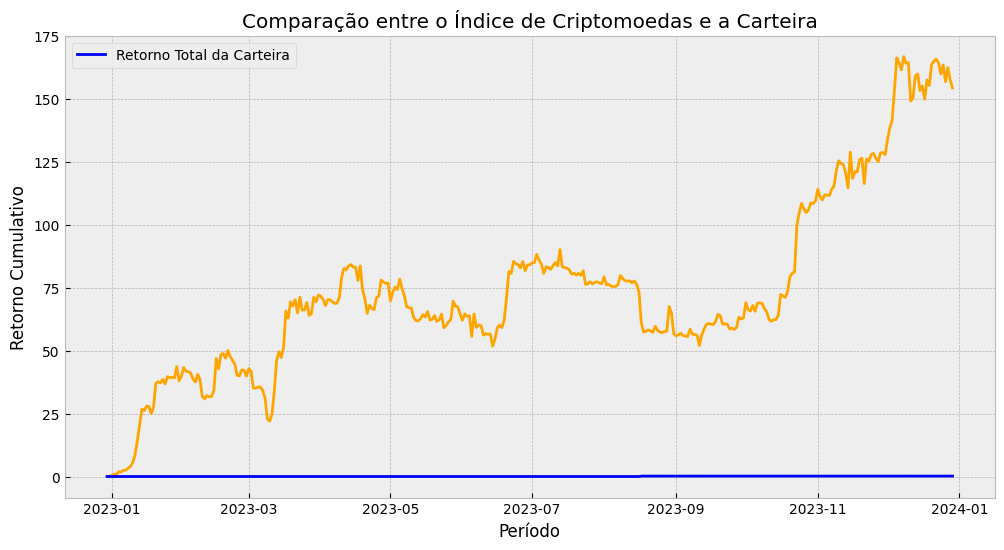

In [74]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir o intervalo de tempo
btc_start_date = "2022-12-30"
btc_end_date = "2023-12-30"

# Baixar dados históricos do Bitcoin (Apenas Preços Ajustados)
btc_data = yf.download("BTC-USD", start=btc_start_date, end=btc_end_date)["Adj Close"]

# Verificar se os dados foram baixados corretamente
if btc_data.empty:
    print("Nenhum dado encontrado para o período especificado.")
else:
    # Calcular os retornos diários e remover valores ausentes
    btc_returns = btc_data.pct_change().dropna()

    # Criar o benchmark
    btc_index_returns = btc_returns  # Retorno diário
    crypto_index_test = (1 + btc_index_returns).cumprod()  # Retorno cumulativo
    crypto_index_test = (crypto_index_test / crypto_index_test.iloc[0] - 1) * 100  # Ajustar para começar em 0

    # Calcular o retorno total do índice
    crypto_inicio = crypto_index_test.iloc[0].item() # Valor inicial
    crypto_fim = crypto_index_test.iloc[-1].item() # Valor final
    crypto_retorno_total = (crypto_fim - crypto_inicio) / 100  # Retorno total ajustado

    # Exibir o retorno total do índice no período de teste
    print(f"Retorno total do Bitcoin no período: {crypto_retorno_total * 100:.2f}%")

    # Plotar o gráfico do retorno
    plt.style.use('bmh')
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_index_test, color="orange")

# Plotar os retornos
plt.plot(portfolio_returns['Total_Returns'], label="Retorno Total da Carteira", color="blue")
plt.title('Comparação entre o Índice de Criptomoedas e a Carteira')
plt.xlabel('Período')
plt.ylabel('Retorno Cumulativo')
plt.legend()
plt.show()

##### **7. Aumentando o Período de Teste**

- Período: 01/01/2022 a 30/09/2024;

- Dados Reais;

[*********************100%***********************]  7 of 7 completed
C:\Users\lucas\AppData\Local\Temp\ipykernel_12768\841578294.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_

Melhor janela para ADA-USD: Curta=50, Longa=100
Melhor janela para NMC-USD: Curta=30, Longa=250
Melhor janela para XRP-USD: Curta=30, Longa=100
Melhor janela para DOGE-USD: Curta=10, Longa=150
Melhor janela para ETC-USD: Curta=20, Longa=250


C:\Users\lucas\AppData\Local\Temp\ipykernel_12768\841578294.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
C

Melhor janela para ETH-USD: Curta=20, Longa=100
Melhor janela para DAI-USD: Curta=10, Longa=100

Retornos da estratégia de média móvel no período de teste (2022 a 2024):
ADA-USD: 1.05%
NMC-USD: 9.56%
XRP-USD: 138.91%
DOGE-USD: 27.06%
ETC-USD: -4.70%
ETH-USD: -16.83%
DAI-USD: 2.42%

Retorno total da carteira: 27.00%


[*********************100%***********************]  5 of 5 completed
C:\Users\lucas\AppData\Local\Temp\ipykernel_12768\841578294.py:112: RuntimeWarning: divide by zero encountered in scalar divide
  crypto_retorno_total = (crypto_fim / crypto_inicio) - 1


Retorno total do índice de criptomoedas no período: inf%


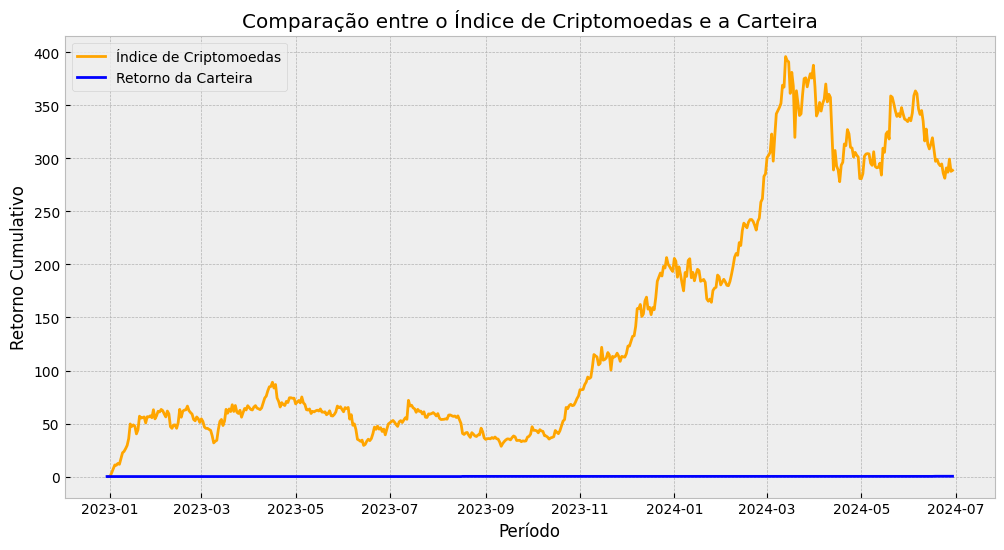

In [80]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurações da estratégia
tickers = ["ADA-USD","NMC-USD", "XRP-USD", "DOGE-USD","ETC-USD", "ETH-USD", "DAI-USD"]
start_date_train = "2020-12-30"
end_date_train = "2022-12-30"
start_date_test = "2022-12-30"
end_date_test = "2024-06-30"

# Função para executar a estratégia de média móvel
def moving_average_strategy(data, short_window=50, long_window=200):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data
    signals['Short_MA'] = data.rolling(window=short_window).mean()
    signals['Long_MA'] = data.rolling(window=long_window).mean()
    signals['Signal'] = 0.0

    # Gerar sinais de compra (+1) e venda (-1)
    signals['Signal'][short_window:] = np.where(signals['Short_MA'][short_window:] > signals['Long_MA'][short_window:], 1.0, -1.0)
    signals['Position'] = signals['Signal'].diff()  # Identifica mudanças nos sinais

    return signals

# Baixar dados históricos de treinamento
dados_train = yf.download(tickers, start=start_date_train, end=end_date_train, interval="1d")["Adj Close"]

# Otimizar a estratégia para encontrar os melhores parâmetros de janela
best_params = {}
for ticker in tickers:
    data = dados_train[ticker].dropna()
    best_return = -np.inf
    best_short_window = None
    best_long_window = None
    
    # Testar várias combinações de janelas curtas e longas
    for short_window in range(10, 60, 10):  # Janela curta de 10 a 50 dias
        for long_window in range(100, 300, 50):  # Janela longa de 100 a 250 dias
            signals = moving_average_strategy(data, short_window, long_window)
            # Calcular o retorno cumulativo
            returns = (signals['Position'] * data.pct_change()).cumsum().iloc[-1]
            
            # Verificar se essa combinação é melhor
            if returns > best_return:
                best_return = returns
                best_short_window = short_window
                best_long_window = long_window
    
    # Salvar os melhores parâmetros para cada ativo
    best_params[ticker] = (best_short_window, best_long_window)
    print(f"Melhor janela para {ticker}: Curta={best_short_window}, Longa={best_long_window}")

# Testar a estratégia com os melhores parâmetros de 2022 a 2023
dados_test = yf.download(tickers, start=start_date_test, end=end_date_test, interval="1d")["Adj Close"]
strategy_results = {}
portfolio_returns = pd.DataFrame(index=dados_test.index)

# Pesos da carteira baseados na volatilidade histórica calculada anteriormente
pesos = {
    "ETC-USD": (2.90/100),
    "DOGE-USD": (2.06/100),
    "ADA-USD": (2.49/100),
    "NMC-USD": (87.57/100),
    "XRP-USD": (0.92/100),
    "DAI-USD": (2.28/100),
    "ETH-USD": (1.79/100)
}

for ticker in tickers:
    data_test = dados_test[ticker].dropna()
    short_window, long_window = best_params[ticker]
    signals = moving_average_strategy(data_test, short_window, long_window)
    
    # Calcular o retorno da estratégia para cada criptomoeda
    signals['Strategy_Returns'] = signals['Position'] * data_test.pct_change()
    strategy_results[ticker] = signals['Strategy_Returns'].cumsum()
    portfolio_returns[ticker] = signals['Strategy_Returns']
    #print(f"Retorno da estratégia para {ticker} no período de teste: {strategy_results[ticker].iloc[-1]:.2%}")

# Calcular o retorno da carteira ponderado pelos pesos
portfolio_returns['Total_Returns'] = portfolio_returns.mul(list(pesos.values()), axis=1).sum(axis=1).cumsum()
#print(f"\nRetorno total da carteira no período de teste: {portfolio_returns['Total_Returns'].iloc[-1]:.2%}")

# Exibir os retornos finais da estratégia para cada criptomoeda e o retorno total da carteira
print("\nRetornos da estratégia de média móvel no período de teste (2022 a 2024):")
for ticker, returns in strategy_results.items():
    print(f"{ticker}: {returns.iloc[-1]:.2%}")

print(f"\nRetorno total da carteira: {portfolio_returns['Total_Returns'].iloc[-1]:.2%}")

# Configurações do índice
crypto_symbols = ["BTC-USD", "ETH-USD", "BNB-USD", "ADA-USD", "SOL-USD"]
start_date_index = "2022-12-30"
end_date_index = "2024-06-30"

# Baixar dados históricos ajustados de fechamento para as criptomoedas no período de teste
crypto_data = yf.download(crypto_symbols, start=start_date_index, end=end_date_index)["Adj Close"]

# Calcular os retornos diários de cada criptomoeda e remover valores ausentes
crypto_returns = crypto_data.pct_change().dropna()

# Criar o índice igualmente ponderado (média dos retornos diários)
crypto_index_returns = crypto_returns.mean(axis=1)  # Retorno médio diário
crypto_index = (1 + crypto_index_returns).cumprod()  # Retorno cumulativo do índice
crypto_index = (crypto_index / crypto_index.iloc[0] - 1) * 100

# Calcular o retorno total do índice
crypto_inicio = crypto_index.iloc[0]
crypto_fim = crypto_index.iloc[-1]
crypto_retorno_total = (crypto_fim / crypto_inicio) - 1
# crypto_retorno_anual = (1 + crypto_retorno_total) ** (1 / 2) - 1 - Retorno anualizado

# Exibir o retorno anualizado do índice em 2022
print(f"Retorno total do índice de criptomoedas no período: {crypto_retorno_total * 100:.2f}%")

# Plotar os retornos
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.plot(crypto_index, label='Índice de Criptomoedas', color='orange')
plt.plot(portfolio_returns['Total_Returns'], label='Retorno da Carteira', color='blue')
plt.title('Comparação entre o Índice de Criptomoedas e a Carteira')
plt.xlabel('Período')
plt.ylabel('Retorno Cumulativo')
plt.legend()
plt.show()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


Processando BTC-USD...


23:43:14 - cmdstanpy - INFO - Chain [1] start processing
23:43:14 - cmdstanpy - INFO - Chain [1] done processing


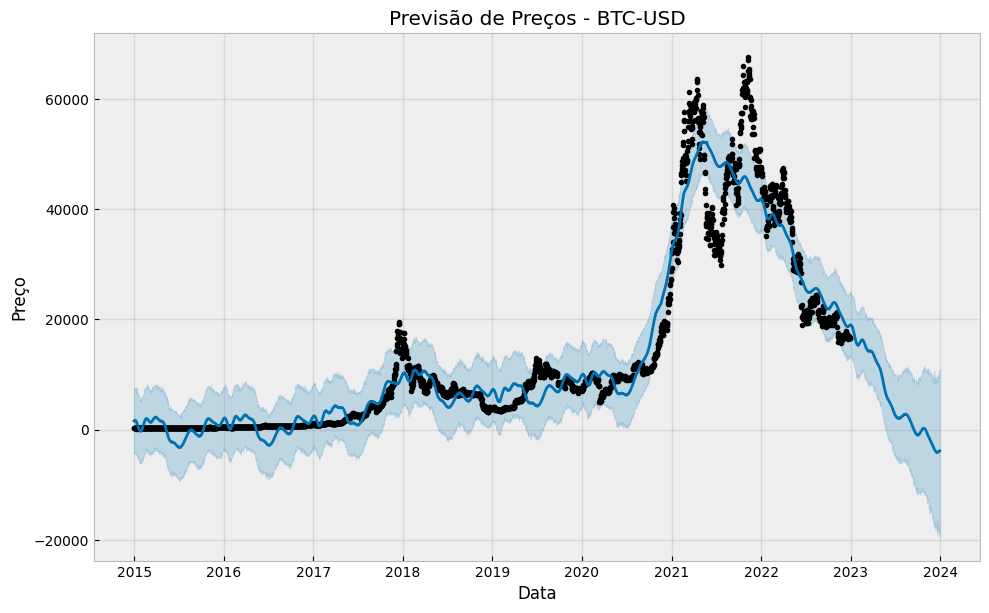

23:43:15 - cmdstanpy - INFO - Chain [1] start processing


Processando ETH-USD...


23:43:15 - cmdstanpy - INFO - Chain [1] done processing


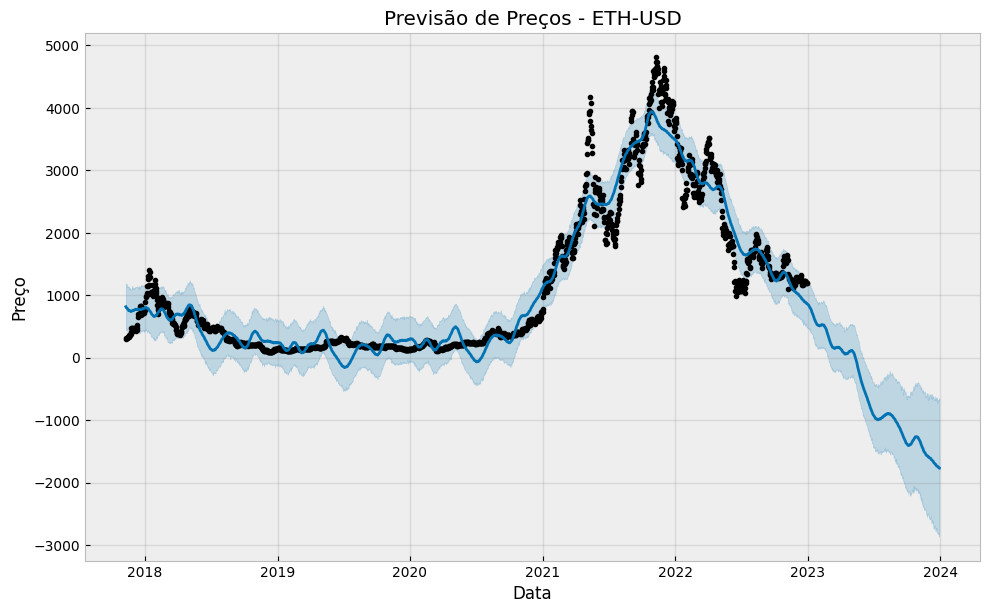

Processando USDT-USD...


23:43:16 - cmdstanpy - INFO - Chain [1] start processing
23:43:17 - cmdstanpy - INFO - Chain [1] done processing


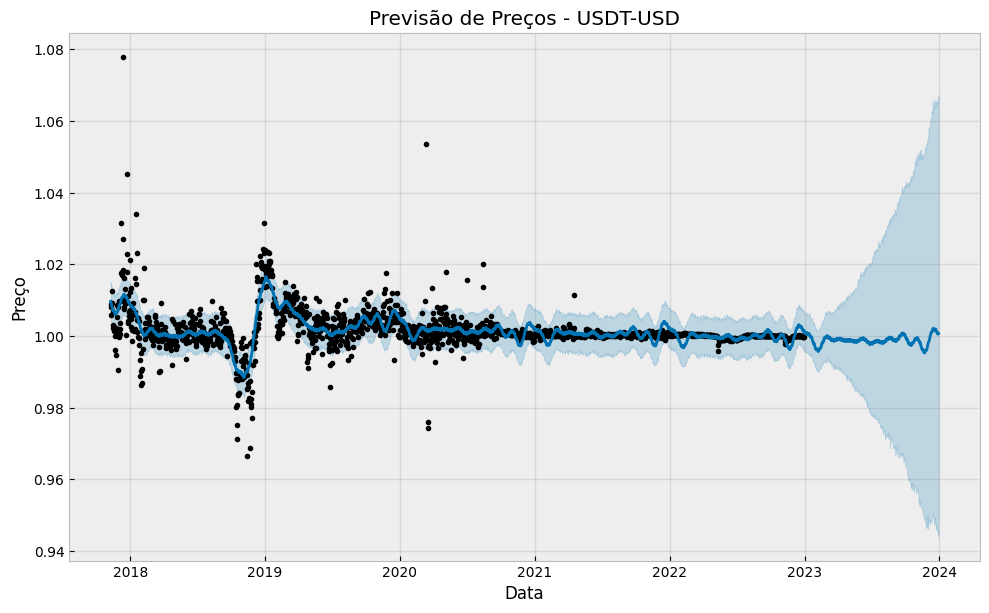

23:43:18 - cmdstanpy - INFO - Chain [1] start processing


Processando USDC-USD...


23:43:18 - cmdstanpy - INFO - Chain [1] done processing


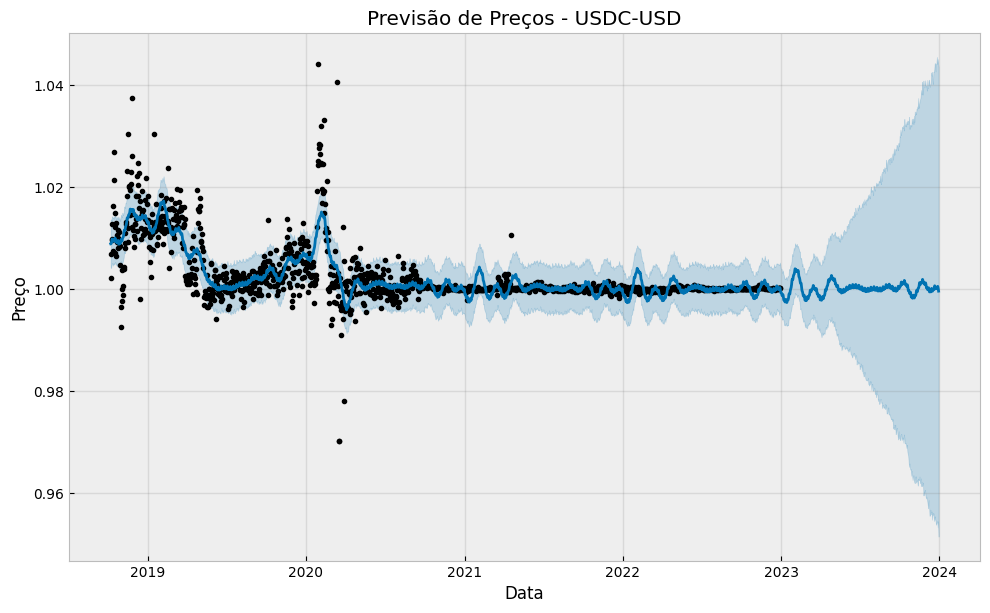

Processando BCH-USD...


23:43:19 - cmdstanpy - INFO - Chain [1] start processing
23:43:19 - cmdstanpy - INFO - Chain [1] done processing


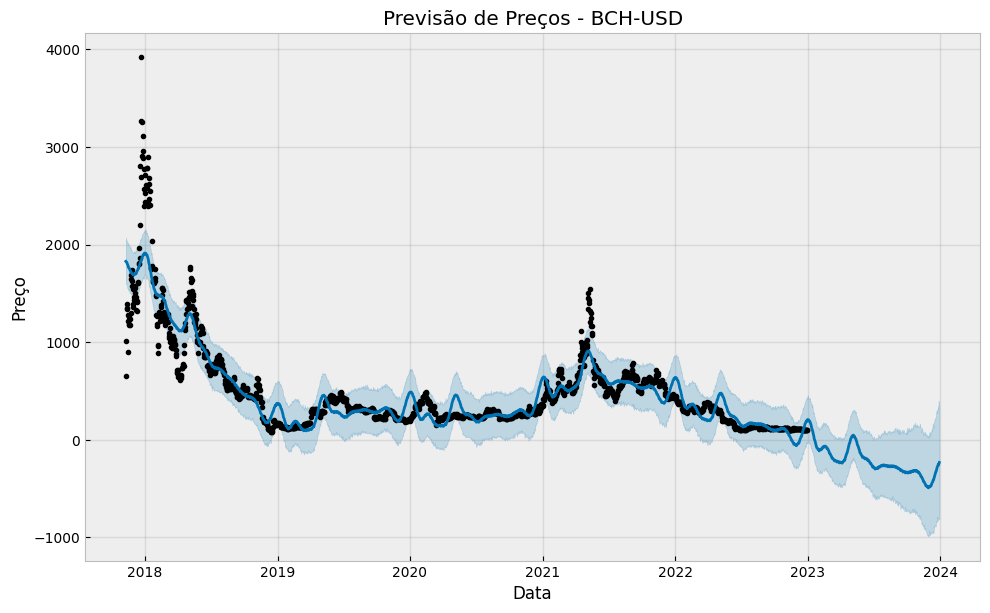

Previsões concluídas!


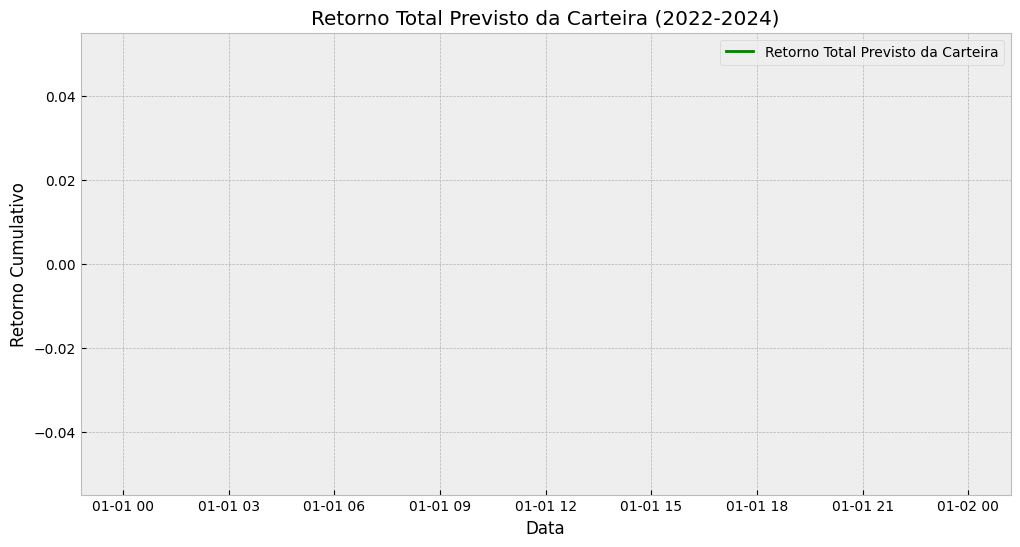

Retorno total previsto da carteira de 2022 a 2024: nan%
Métricas para BTC-USD:
MAE: 28739.2427
MSE: 861538242.5604
MAPE: 99.54%

Métricas para ETH-USD:
MAE: 1267.3727
MSE: 1736549.9256
MAPE: 69.73%

Métricas para USDT-USD:
MAE: 0.0032
MSE: 0.0000
MAPE: 0.32%

Métricas para USDC-USD:
MAE: 0.0073
MSE: 0.0001
MAPE: 0.73%

Métricas para BCH-USD:
MAE: 916.1290
MSE: 1106278.6573
MAPE: 652.78%



In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Configurações da estratégia
tickers = ["BTC-USD", "ETH-USD", "USDT-USD", "USDC-USD", "BCH-USD"]
start_date_train = "2015-01-01"
end_date_train = "2022-12-31"
start_date_test = "2023-01-01"
end_date_test = "2024-01-01"

# Pesos da carteira baseados na volatilidade histórica calculada anteriormente
pesos = {
    "BTC-USD": 0.0297,
    "ETH-USD": 0.0485,
    "USDT-USD": 0.0376,
    "USDC-USD": 0.4429,
    "BCH-USD": 0.4414
}

# Baixar dados históricos de treinamento
dados_train = yf.download(tickers, start=start_date_train, end=end_date_train, interval="1d")["Adj Close"]

# Baixar dados históricos de teste (previsão)
dados_test = yf.download(tickers, start=start_date_test, end=end_date_test, interval="1d")["Adj Close"]

# Função para preparar os dados no formato do Prophet
def preparar_dados_prophet(serie, ticker):
    df = serie.reset_index()[['Date', ticker]].rename(columns={'Date': 'ds', ticker: 'y'})
    df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)  # Remover fuso horário
    return df

# Dicionário para armazenar previsões
previsoes_prophet = {}

for ticker in tickers:
    print(f"Processando {ticker}...")
    
    # Preparar os dados no formato do Prophet
    df_train = preparar_dados_prophet(dados_train[ticker].dropna(), ticker)
    
    # Ajustar o modelo Prophet
    modelo_prophet = Prophet(daily_seasonality=True)
    modelo_prophet.fit(df_train)
    
    # Criar DataFrame para previsões (365 dias)
    futuro = modelo_prophet.make_future_dataframe(periods=365)
    previsao = modelo_prophet.predict(futuro)
    
    # Armazenar as previsões
    previsoes_prophet[ticker] = previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    # Plotar a previsão
    fig = modelo_prophet.plot(previsao)
    plt.title(f"Previsão de Preços - {ticker}")
    plt.xlabel("Data")
    plt.ylabel("Preço")
    plt.show()
    
print("Previsões concluídas!")

# Combinar previsões com dados reais de 2022
precos_combinados = {}

for ticker in tickers:
    # Dados reais de 2022
    df_real = preparar_dados_prophet(dados_train[ticker].dropna(), ticker)
    
    # Previsões de 2023-2024
    df_prev = previsoes_prophet[ticker].copy()
    
    # Combinar os dados
    df_combinado = pd.concat([df_real, df_prev.set_index('ds')], axis=0).reset_index()
    
    # Remover duplicatas (caso haja sobreposição de datas)
    df_combinado = df_combinado.drop_duplicates(subset='ds', keep='last')
    
    # Armazenar no dicionário
    precos_combinados[ticker] = df_combinado.set_index('ds')['yhat']
    
# Criar DataFrame combinado
df_portfolio = pd.DataFrame(precos_combinados)

# Calcular retornos diários
retornos = df_portfolio.pct_change().dropna()

# Aplicar os pesos da carteira
retornos_ponderados = retornos.mul(list(pesos.values()), axis=1)

# Calcular o retorno total da carteira
retorno_total_portfolio = retornos_ponderados.sum(axis=1).cumprod()

# Adicionar ao DataFrame
df_portfolio['Retorno_Ponderado'] = retorno_total_portfolio

# Plotar o retorno total previsto da carteira
plt.figure(figsize=(12, 6))
plt.plot(df_portfolio['Retorno_Ponderado'], label='Retorno Total Previsto da Carteira', color='green')
plt.title("Retorno Total Previsto da Carteira (2022-2024)")
plt.xlabel("Data")
plt.ylabel("Retorno Cumulativo")
plt.legend()
plt.show()

# Exibir o retorno final
retorno_final = df_portfolio['Retorno_Ponderado'].iloc[-1] - 1
print(f"Retorno total previsto da carteira de 2022 a 2024: {retorno_final * 100:.2f}%")

# (Opcional) Calcular Métricas de Avaliação se dados reais de 2023 estiverem disponíveis
for ticker in tickers:
    # Verificar se há dados reais para comparar
    if ticker in dados_test.columns and not dados_test[ticker].dropna().empty:
        y_true = dados_test[ticker].dropna().values
        y_pred = previsoes_prophet[ticker]['yhat'][:len(y_true)].values
        
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        
        print(f"Métricas para {ticker}:")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"MAPE: {mape * 100:.2f}%\n")
    else:
        print(f"Não há dados reais disponíveis para {ticker} para calcular as métricas.\n")